# 2008 financial crisis responses

This notebook examines the central bank actions of OECD countries following the 2008 financial crisis. It finds that Iceland took the most drastic action between 2008 and 2011 in terms of reducing interest rates and increasing the money supply. 

<br>

The OECD API was first used to collect the following statistics on OECD countries:

- Short-term interest rates (annual %)
- M1 money supply (expressed as a seasonally adjusted index based on 2015=100.)

<br>

An SQL script was then used to create the following measures:

1. total action rank (based on interest cut rank + money supply hike rank)
2. interest rate cut rank (based on deepest interest rate cut)
3. deepest interest rate cut (from the 2003-2007 average to the minimum interest between 2008 and 2011)
4. average interest rate from 2003-2007
5. minimum interest rate from 2008-2011  
6. money supply hike rank (based on largest money supply hike)
7. largest money supply hike (from the 2003-2007 average to the minimum money supply between 2008 and 2011)
8. average money supply from 2003-2007
9. minimum money supply from 2008-2011

<br>

## Prepare data

The transformed data is first read-in and then long country names are shortened for clarity when plotting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# reads in the dataframe
macroeconomic_df = pd.read_csv('Macroeconomic data\\financial_crisis_df.csv')

# reassigns long country names for clarity
macroeconomic_df.loc[macroeconomic_df['COUNTRY'] == 'United States', 'COUNTRY'] = 'US'
macroeconomic_df.loc[macroeconomic_df['COUNTRY'] == 'United Kingdom', 'COUNTRY'] = 'UK'
macroeconomic_df.loc[macroeconomic_df['COUNTRY'] == 'New Zealand', 'COUNTRY'] = 'NZ'
macroeconomic_df.loc[macroeconomic_df['COUNTRY'] == 'South Africa', 'COUNTRY'] = 'SA'

## Total action

The plot below is a rank order reflecting a combination of interest rate cut and money supply hike ranks. It shows which countries took the most drastic action (a lower rank indicates greater action) in the years following the 2008 finacial crisis (2008-2011).

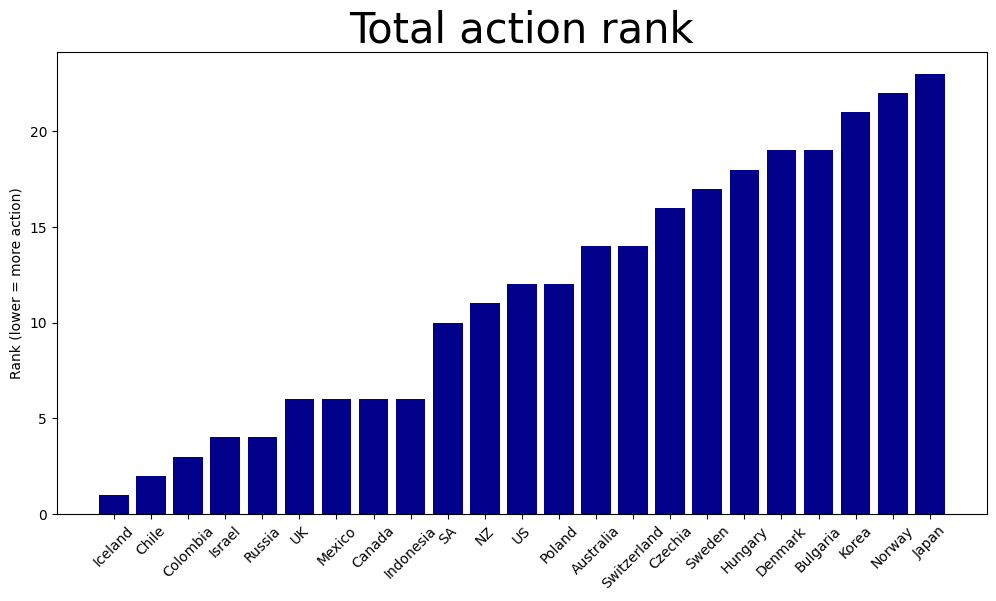

In [2]:
# plots total action by country
plt.figure(figsize=(12, 6));
plt.title('Total action rank', size=30);
plt.bar(macroeconomic_df['COUNTRY'], macroeconomic_df['TOTAL_ACTION_RANK'], color='darkblue');
plt.xticks(macroeconomic_df['COUNTRY'], rotation=45);
plt.ylabel('Rank (lower = more action)');

## Subplots function

A function is defined to created multiple plots on a specific data type.

In [3]:
# creates a subplot
def plot(data, title, ylabel='%', color='darkred'):
    # creates a subplots object
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    ax = ax.flatten()

    ylabels = ['Rank']
    ylabels.extend([ylabel for x in range(0,3)])
    
    # loops through each plot
    for i, col in enumerate(data.columns[2:len(data.columns)]):
        ax[i].bar(data['COUNTRY'], data[col], color=color);
        ax[i].set_title(' '.join(col.lower().split('_')).title(), size=16);
        ax[i].set_xticks(data['COUNTRY']);
        ax[i].set_xticklabels(data['COUNTRY'], rotation=75);
        ax[i].set_ylabel(ylabels[i]);
    
    fig.suptitle(title, size=30, y=1);
    plt.tight_layout();
    plt.show();

# Interest rates (%)

The plot below depicts each country's interest rate cut rank, deepest interest rate cut between 2008-2011, average interest rate between 2003-2007 and minimum interest rate between 2008-2008. It is ordered by total action for continuity between plot types. The fact that the rank plot is not perfectly smooth demonstrates how some countries chose to use specific monetary tools more than others. 

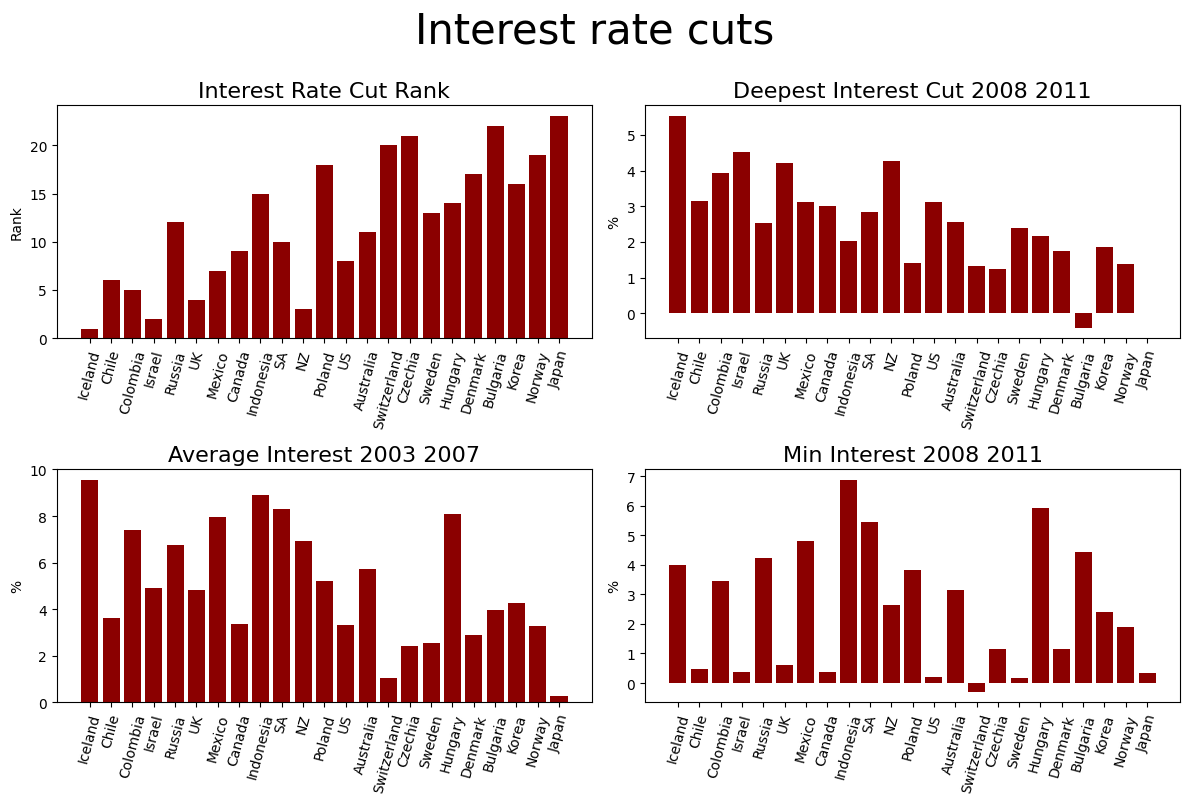

In [4]:
# defines interest rate columns
interest_cols = ['COUNTRY', 'TOTAL_ACTION_RANK', 'INTEREST_RATE_CUT_RANK', 'DEEPEST_INTEREST_CUT_2008_2011', 'AVERAGE_INTEREST_2003_2007', 'MIN_INTEREST_2008_2011']

# creates an interest dataframe
interest_data = macroeconomic_df[interest_cols].sort_values('TOTAL_ACTION_RANK')

# plots the data
plot(interest_data, title='Interest rate cuts')

## Money supply (index: 2015=100)

The plot below depicts each country's money supply hike rank, largest money supply hike between 2008-2011, average money supply between 2003-2007 and minimum money supply between 2008-2008. It is ordered by total action for continuity between plot types. The fact that the rank plot is not perfectly smooth demonstrates how some countries chose to use specific monetary tools more than others.

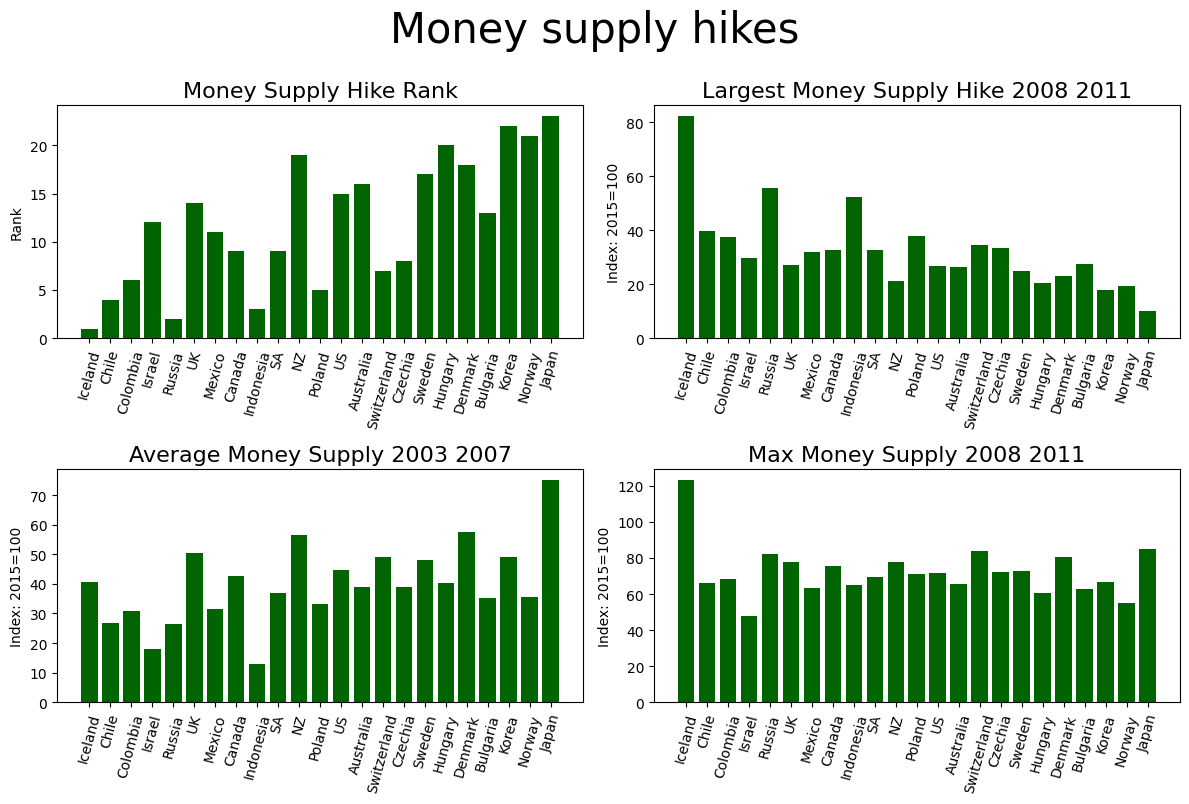

In [5]:
# defines interest rate columns
money_supply_cols = ['COUNTRY', 'TOTAL_ACTION_RANK', 'MONEY_SUPPLY_HIKE_RANK', 'LARGEST_MONEY_SUPPLY_HIKE_2008_2011', 'AVERAGE_MONEY_SUPPLY_2003_2007', 'MAX_MONEY_SUPPLY_2008_2011']

# creates an interest dataframe
data = macroeconomic_df[money_supply_cols].sort_values('TOTAL_ACTION_RANK')

# plots the data
plot(data, title='Money supply hikes', ylabel='Index: 2015=100', color='darkgreen')